<a href="https://colab.research.google.com/github/JuanM-GG/Control-with-python-/blob/main/bal_reac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: Balances en reactor

Nombre: Juan Manuel G.G

Fecha: Diciembre 8, 2020

#Ecuaciones de balance

En ingeniería, hay cuatro tipos comúnes de ecuaciones de balance que se derivan de principios de conservación; Estas son: balance de masa, momento, energía y especies. A continuación, se muestra la forma general de cada una de ellas. 

### Balance de masa

$$\frac{dm}{dt} = \frac{d(\rho V)}{dt} = \sum \dot{m}_{ent} - \sum \dot{m}_{sal} $$

En la ecuación anterior consideramos un volumen de control en el que pueden existir varios flujos de entrada y de salida. El lado izquierdo de la ecuación representa el cambio de masa del sistema en el tiempo, mientras que el lado derecho representa los flujos de entrada y de salidad del sistema. 

### Balance de especies

Un balance de especies nos permite conocer el cambio de los moles de cada especie en el volumen de control. La acumulación de la especie A, $\frac{dC_{A}}{dt}$, en el volumen de control se calcula a partir de las tasas de entrada, salida, reacciones de generación y reacciones de consumo en el volumen de control. 

$$\frac{dn_{A}}{dt} = \sum \dot{n}_{Aent} - \sum \dot{n}_{Asal} + \sum \dot{n}_{Agen} - \sum \dot{n}_{Acons}$$

La cantidad molar $n_{A}$ es a menudo medida como concentración, $C_{A}$, y las tasas de reacción, $r_{A}$, como tasas molares de generación por volumen.  

$$\frac{d(C_{A}V)}{dt} = \sum C_{Ain} \dot{V}_{in} - \sum C_{Aout} \dot{V}_{out} + r_{A} V$$

### Balance de momento

Un balance de momento se expresa como la acumulación de momento para el volumne de control igualado con la suma de fuerzas $\sum F$ que actuan sobre el volumen de control. 

$$ \frac{d(mv)}{dt} = \sum F$$

Donde $m$ es la masa del volumen de control y $v$ es la velocidad del volumen de control.

### Balance de energía

$$ \frac{dE}{dt} = \frac{d(U + K + P)}{dt} = \sum \dot{m}_{ent} ( \hat{h}_{ent} + \frac{v_{ent}^{2}}{2g_{c}} + \frac{z_{ent} g_{ent}}{g_{c}}) - \sum \dot{m}_{sal} ( \hat{h}_{sal} + \frac{v_{sal}^{2}}{2g_{c}} + \frac{z_{sal} g_{sal}}{g_{c}}) + Q + W_{s}$$

Los términos de energía cinética ($K$) y potencial ($P$) se omiten dado que la energía interna (debida a la temperatura) es, normalmente, una contribución mucho mayor que cualquier cambio de elevación ($z$) o velocidad ($v$) en el fluido para la mayoría de los procesos químicos. 

$$\frac{dh}{dt} = \sum \dot{m}_{ent} \hat{h}_{ent} - \sum \dot{m}_{sal} \hat{h}_{sal} + Q + W_{s}$$

La entalpía, $h$, se relaciona con la temperatura mediante $c_{p}(T - T_{ref})$ donde $c_{p}$ es la capacidad calorífica. Con una temperatura de referencia constante ($T_{ref}$), la expresión se reduce a lo siguiente. 

$$ m c_{p} \frac{dT}{dt} = \sum \dot{m}_{ent} c_{p} (T_{ent} - T_{ref}) - \sum \dot{m}_{sal} c_{p} (T_{sal} - T_{ref}) + Q + W_{s} - \rho c_{p} T \frac{dV}{dt} $$

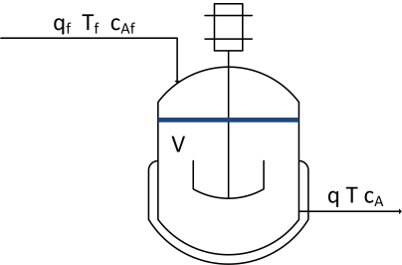

Importar librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Definier modelo

In [30]:
def vessel(s, t, q, qf, Caf, Tf):

  # Entradas (4)
  # q -> Flujo volumétrico en la salida (L/min)
  # qt -> Flujo volumétrico en la entrada (L/min)
  # Caf -> Concentración en la entrada (mol/L)
  # Tf -> Temperatura de alimentación (K)

  # Estado (3)
  # Volumen (L)
  V = s[0]
  # Concentración
  Ca = s[1]
  # Temperatura
  T = s[2]

  # Parámetros
  # Reacción 
  rA = 0.0

  # Balance de masa: Derivada de volumen
  dVdt = qf - q

  # Balance de especies: Derivada de concentración
  dCadt = (qf*Caf - q*Ca)/V - rA - (Ca*(qf - q)/V)

  # Balance de energía: Derivada de temperatura
  # Regla de la cadena: d(V*T)/dt = T*dV/dt + V*dT/dt
  dTdt = (qf*Tf - q*T)/V - (T*(qf - q)/V)

  return [dVdt, dCadt, dTdt]


Establecer condiciones iniciales

In [33]:
V0 = 1.0
Ca0 = 0.0
T0 = 350.0
s = [V0, Ca0, T0]

Intervalo de tiempo (min)

In [34]:
t = np.linspace(0,10,100)

Flujo volumétrico en la entrada

In [35]:
qf = np.ones(len(t))*5.2
qf[50:] = 5.1

Flujo volumétrico en la salida (L/min) 

In [36]:
q = np.ones(len(t))*5.0

Concentración en la alimentación (mol/L)

In [37]:
Caf = np.ones(len(t))*1.0
Caf[30:] = 0.5

Temperatura en la alimentación

In [38]:
Tf = np.ones(len(t))*300.0
Tf[70:] = 325.0

Parámetros 

In [39]:
rA = 0

Para guardar los resultados

In [40]:
V = np.ones(len(t))*V0
Ca = np.ones(len(t))*Ca0
T = np.ones(len(t))*T0

Ciclo a través de cada paso de tiempo

In [41]:
for i in range(len(t)-1):
    # Simular
    inputs = (q[i],qf[i],Caf[i],Tf[i])
    ts = [t[i],t[i+1]]
    out = odeint(vessel,s,ts,args=inputs)
    # Guardar resultados
    V[i+1]  = out[-1][0]
    Ca[i+1] = out[-1][1]
    T[i+1]  = out[-1][2]
    # Ajustar condiciones iniciales para el siguiente ciclo
    s = out[-1]

Construir resultados y guardar archivo con datos

In [42]:
data = np.vstack((t, qf, q, Tf, Caf, V, Ca, T))
data = data.T
np.savetxt("data.txt", data, delimiter = ",")

Graficar entradas y resultados

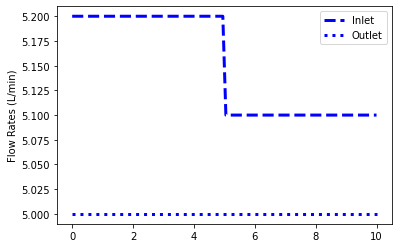

In [43]:
plt.plot(t, qf, "b--", linewidth = 3)
plt.plot(t, q, "b:", linewidth = 3)
plt.ylabel("Flow Rates (L/min)")
plt.legend(["Inlet","Outlet"], loc = "best")
plt.show()

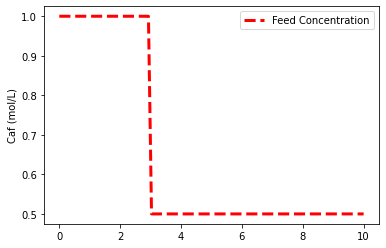

In [45]:
plt.plot(t, Caf, "r--", linewidth = 3)
plt.ylabel("Caf (mol/L)")
plt.legend(["Feed Concentration"], loc = "best")
plt.show()

Text(0.5, 0, 'Time (min)')

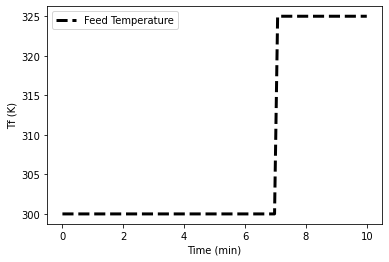

In [46]:
plt.plot(t, Tf, "k--", linewidth = 3)
plt.ylabel("Tf (K)")
plt.legend(["Feed Temperature"], loc = "best")
plt.xlabel("Time (min)")

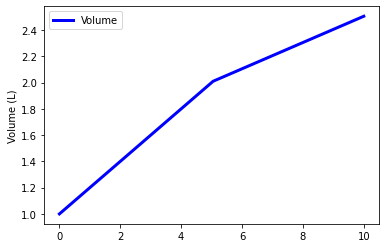

In [47]:
plt.plot(t, V, "b-", linewidth = 3)
plt.ylabel("Volume (L)")
plt.legend(["Volume"], loc = "best")

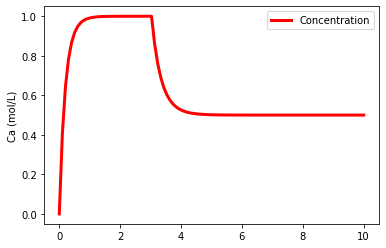

In [48]:
plt.plot(t, Ca, "r-", linewidth = 3)
plt.ylabel("Ca (mol/L)")
plt.legend(["Concentration"], loc = "best")

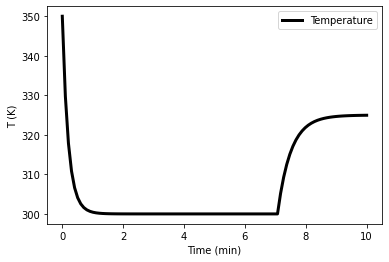

In [44]:
plt.plot(t, T, "k-", linewidth = 3)
plt.ylabel("T (K)")
plt.legend(["Temperature"], loc = "best")
plt.xlabel("Time (min)")
plt.show()